In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# import train.csv and test.csv here using pd.read_csv()
train = pd.read_csv('Data/train.csv', index_col=[0])
test = pd.read_csv('Data/test.csv', index_col=[0])
gender_sub = pd.read_csv('Data/gender_submission.csv', index_col = [0])

In [23]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

In [26]:
train.groupby('Sex')['Survived'].mean().reset_index()   ## use .reset_index() to convert to data frame

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [85]:
train.groupby('Pclass')['Survived'].mean().reset_index()


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [51]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 120]
labels = ['0-9','10-19','20-29', '30-39', '40-49', '50-59', '60-69', '70+']
train['Age_ranges'] = pd.cut(x = train['Age'], bins = bins, labels = labels, include_lowest = True)

In [53]:
train.groupby('Age_ranges').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age_ranges,,,,,,
0-9,0.593750,2.640625,4.268281,1.843750,1.421875,30.434439
10-19,0.382609,2.530435,17.317391,0.591304,0.391304,29.529531
20-29,0.365217,2.386957,25.423913,0.321739,0.239130,28.306719
30-39,0.445161,2.090323,35.051613,0.374194,0.393548,42.496100
40-49,0.383721,1.918605,45.372093,0.372093,0.430233,41.163181
50-59,0.404762,1.523810,54.892857,0.309524,0.309524,44.774802
60-69,0.235294,1.529412,63.882353,0.176471,0.352941,45.910782
70+,0.200000,1.800000,73.300000,0.000000,0.000000,25.936680


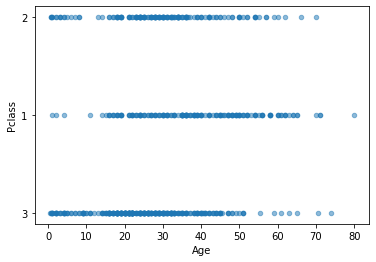

In [33]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 120]
labels = ['0-9','10-19','20-29', '30-39', '40-49', '50-59', '60-69', '70+']
train['Age_ranges'] = pd.cut(x = train['Age'], bins = bins, labels = labels, include_lowest = True)

In [59]:
train['Fare'].max(),train['Fare'].min(),train['Fare'].median()

(512.3292, 0.0, 14.4542)

In [96]:
train['Fare_Qtile'] = pd.qcut(train['Fare'],10, labels = range(10))

In [72]:
train.groupby('Fare_Qtile').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Fare_Qtile,,,,,,
0,0.141304,2.804348,29.088710,0.065217,0.021739,5.928717
1,0.298851,3.000000,27.845455,0.068966,0.034483,7.768490
2,0.179245,3.000000,28.858108,0.094340,0.018868,7.963669
3,0.230769,2.692308,28.547500,0.076923,0.064103,9.521367
4,0.428571,2.261905,29.037500,0.202381,0.178571,12.940231
5,0.420455,2.795455,23.059701,0.852273,0.636364,17.386408
6,0.516854,1.932584,34.520833,0.606742,0.494382,25.487501
7,0.373626,1.934066,27.122875,1.208791,1.098901,32.282186
8,0.528090,1.561798,33.972603,1.415730,0.629213,59.444572


In [74]:
train.groupby(['Sex','Fare_Qtile']).mean()

Survived    Pclass        Age     SibSp     Parch  \
Sex    Fare_Qtile                                                      
female 0           0.777778  3.000000  18.166667  0.000000  0.000000   
       1           0.655172  3.000000  23.233333  0.034483  0.068966   
       2           0.615385  3.000000  22.500000  0.384615  0.153846   
       3           0.478261  2.652174  30.000000  0.173913  0.130435   
       4           0.777778  2.416667  25.441176  0.194444  0.305556   
       5           0.634146  2.780488  23.985294  0.975610  0.829268   
       6           0.794872  2.179487  28.290323  0.820513  0.871795   
       7           0.548387  2.290323  23.800000  1.419355  1.806452   
       8           0.864865  1.378378  33.774194  1.378378  0.837838   
       9           0.964286  1.000000  33.400000  0.607143  0.553571   
male   0           0.072289  2.783133  30.258929  0.072289  0.024096   
       1           0.120690  3.000000  29.575000  0.086207  0.017241   
       2           0.118280  3.000000  29.628788  0.053763  0.000000   
       3           0.127273  2.709091  27.908400  0.036364  0.036364   
       4           0.166667  2.145833  31.695652  0.208333  0.083333   
       5           0.234043  2.808511  22.106061  0.744681  0.468085   
       6           0.300000  1.740000  39.231707  0.440000  0.200000   
       7           0.283333  1.750000  29.116600  1.100000  0.733333   
       8           0.288462  1.692308  34.119048  1.442308  0.480769   
       9           0.387097  1.000000  34.686897  0.709677  0.838710   

                         Fare  
Sex    Fare_Qtile              
female 0             7.278244  
       1             7.761786  
       2             7.935908  
       3             9.793478  
       4            12.953478  
       5            17.554668  
       6            25.102138  
       7            32.009406  
       8            60.689870  
       9           141.871129  
male   0             5.782383  
       1             7.771841  
       2             7.967549  
       3             9.407575  
       4            12.930296  
       5            17.239628  
       6            25.788084  
       7            32.423122  
       8            58.558494  
       9           155.723655

In [97]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_ranges,Fare_Qtile
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39,8
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39,8
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39,2


In [123]:
graph_df1 = train.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()
print(graph_df1)

   Pclass     Sex  Survived
0       1  female  0.968085
1       1    male  0.368852
2       2  female  0.921053
3       2    male  0.157407
4       3  female  0.500000
5       3    male  0.135447


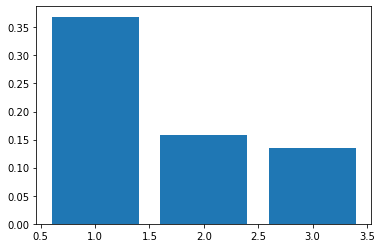

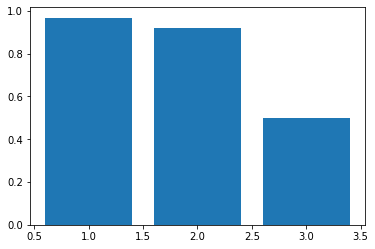

In [130]:
male = graph_df1[graph_df1['Sex'] == 'male']
female = graph_df1[graph_df1['Sex'] == 'female']
plt.bar(x = male['Pclass'], height = male['Survived'])
plt.show()
plt.bar(x = female['Pclass'], height = female['Survived'])
plt.show()

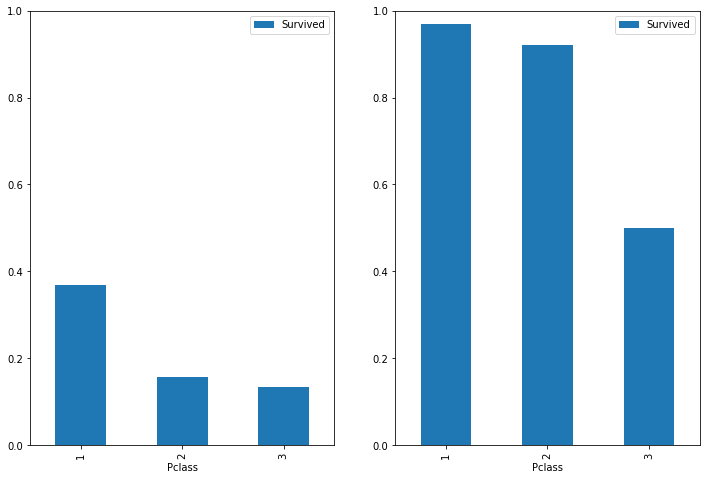

In [145]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
male.plot(x='Pclass', y= 'Survived', ax = axes[0], kind = 'bar', ylim = [0,1] )
female.plot(x='Pclass', y= 'Survived', ax = axes[1], kind = 'bar', ylim= (0,1) )

In [134]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, optional, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (`sharex`) or y (`sharey`)
        axes:
    
            - True or 'all': x- or y-axis will be shared among all
              subplots.
            - False or 'none': each subplot x- or y-axis will be
              independent.
            - 'row': each subplot row will share an x- or y-axis.
            - 'col': each subplot column will share an x- or y-axis.
    
        Wh

In [121]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *width* and *height*. The vertical baseline
    is *bottom* (default 0).
    
    Each of *x*, *height*, *width*, and *bottom* may either be a scalar
    applying to all bars, or it may be a sequence of length N providing a
    separate value for each bar.
    
    Parameters
    ----------
    x : sequence of scalars
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : scalar or sequence of scalars
        The height(s) of the bars.
    
    width : scalar or array-like, optional
        The width(s) of the bars (default: 0.8).
    
    bottom : scalar or array-like, optional
        The y coordinate(s) of the bars bases (default: 0).
    
    align : {'cent